In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date converter


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


# Background

### Coronavirus disease 2019 (COVID-19) is an infectious disease that affects humans with severe acute respiratory syndrome coronavirus 2. The first case of COVID-19 was identified in Wuhan, China in January 2020 and has since infected more than 200 countries.

### This is an exploratory analysis of the trends in cases and deaths for the countries most heavily impacted by the virus between January to March 2020. Also included is a snapshot of the rapid increase in cases in the United States, where a delay in instilling preventive measures may have led to it having the highest number of cases to date.

# The Data
### The COVID-19 dataset contains daily updates on the cumulative number of confirmed cases, deaths, and recoveries in each affected country.

In [2]:
print("Dataset: Covid-19")
covid19 = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
print("Rows:", len(covid19))
print("Column Names:", ', '.join(map(str, covid19.columns)))
print("Most Recent Observation:", max(covid19["ObservationDate"]))


#conversion
covid19["ObservationDate_Coverted"] = pd.to_datetime(covid19["ObservationDate"])
covid19_Mar = covid19[covid19["ObservationDate_Coverted"].dt.month < 4]

#summary
covid19_Mar_dt_summary = covid19_Mar.groupby("ObservationDate")["ObservationDate","Confirmed","Deaths","Recovered"].sum().reset_index()
covid19_Mar_dt_summary.sort_values("ObservationDate", ascending = False).style.background_gradient(cmap="PuBu")

Dataset: Covid-19
Rows: 14491
Column Names: SNo, ObservationDate, Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered
Most Recent Observation: 04/12/2020


,ObservationDate,Confirmed,Deaths,Recovered
69,03/31/2020,857487,42107,178028
68,03/30/2020,782389,37582,164560
67,03/29/2020,720140,33925,149076
66,03/28/2020,660693,30652,139409
65,03/27/2020,593291,27198,130909
64,03/26/2020,529591,23970,122144
63,03/25/2020,467594,21181,113764
62,03/24/2020,417966,18615,107699
61,03/23/2020,378287,16497,100958
60,03/22/2020,337122,14623,97243


# Case Summary: China
### China, where the outbreak is presumed to have originated, initially experienced a high number of cases after millions of people traveled to and from the country during the Lunar New Year holiday. Due to the government's stringent efforts to contain the outbreak, the number of cases started to plateau in mid-March.

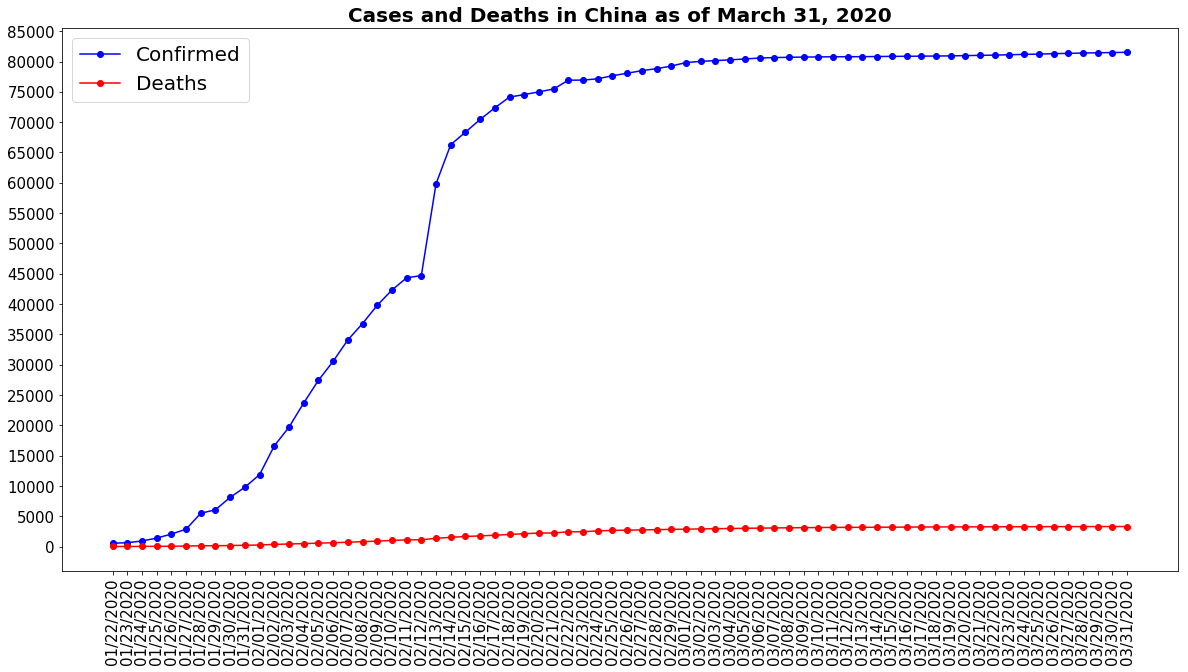

In [3]:
covid19_Mar_China = covid19_Mar[covid19_Mar["Country/Region"].str.contains("China")]
covid19_Mar_China_dt = covid19_Mar_China.groupby("ObservationDate").sum().reset_index()

plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(np.arange(0, 90000, 5000), fontsize = 15)
plt.title("Cases and Deaths in China as of March 31, 2020", fontsize = 20, fontweight = "bold")
plt.plot(covid19_Mar_China_dt["ObservationDate"], covid19_Mar_China_dt["Confirmed"], "bo-")
plt.plot(covid19_Mar_China_dt["ObservationDate"], covid19_Mar_China_dt["Deaths"], "ro-")
plt.legend(["Confirmed", "Deaths"], fontsize = 20)

# Case Summary: Most Affected Countries Outside of China
### Countries outside of China experienced a high number of cases as people continued to travel to and from these regions, leading to widespread community transmission. Italy in particular experienced a significant increase in cases around the time that the World Health Organization declared COVID-19 a pandemic. As of March 2020, Italy surpassed China in the number of COVID-19 deaths.

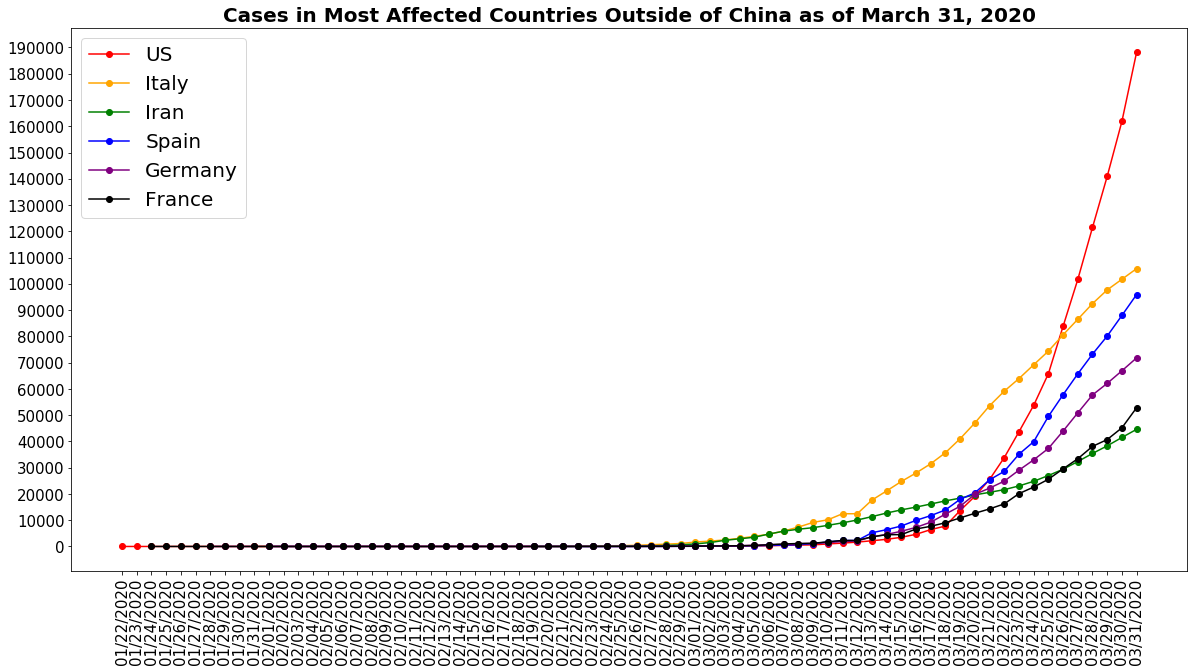

In [4]:
#Italy
covid19_Mar_Italy = covid19_Mar[covid19_Mar["Country/Region"]=="Italy"]
covid19_Mar_Italy_dt = covid19_Mar_Italy.groupby("ObservationDate").sum().reset_index()
#Iran
covid19_Mar_Iran = covid19_Mar[covid19_Mar["Country/Region"]=="Iran"]
covid19_Mar_Iran_dt = covid19_Mar_Iran.groupby("ObservationDate").sum().reset_index()
#Spain
covid19_Mar_Spain = covid19_Mar[covid19_Mar["Country/Region"]=="Spain"]
covid19_Mar_Spain_dt = covid19_Mar_Spain.groupby("ObservationDate").sum().reset_index()
#Germany
covid19_Mar_Germany = covid19_Mar[covid19_Mar["Country/Region"]=="Germany"]
covid19_Mar_Germany_dt = covid19_Mar_Germany.groupby("ObservationDate").sum().reset_index()
#United States
covid19_Mar_US = covid19_Mar[covid19_Mar["Country/Region"]=="US"]
covid19_Mar_US_dt = covid19_Mar_US.groupby("ObservationDate").sum().reset_index()
#France
covid19_Mar_France = covid19_Mar[covid19_Mar["Country/Region"]=="France"]
covid19_Mar_France_dt = covid19_Mar_France.groupby("ObservationDate").sum().reset_index()

plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(np.arange(0, 200000, step = 10000), fontsize = 15)
plt.title("Cases in Most Affected Countries Outside of China as of March 31, 2020", fontsize = 20, fontweight = "bold")
plt.plot(covid19_Mar_US_dt["ObservationDate"], covid19_Mar_US_dt["Confirmed"], "o-", color = "red")
plt.plot(covid19_Mar_Italy_dt["ObservationDate"], covid19_Mar_Italy_dt["Confirmed"], "o-", color = "orange")
plt.plot(covid19_Mar_Iran_dt["ObservationDate"], covid19_Mar_Iran_dt["Confirmed"], "go-")
plt.plot(covid19_Mar_Spain_dt["ObservationDate"], covid19_Mar_Spain_dt["Confirmed"], "bo-")
plt.plot(covid19_Mar_Germany_dt["ObservationDate"], covid19_Mar_Germany_dt["Confirmed"], "o-", color = "purple")
plt.plot(covid19_Mar_France_dt["ObservationDate"], covid19_Mar_France_dt["Confirmed"], "o-", color = "black")
plt.legend(["US", "Italy", "Iran", "Spain", "Germany", "France"], fontsize = 20)

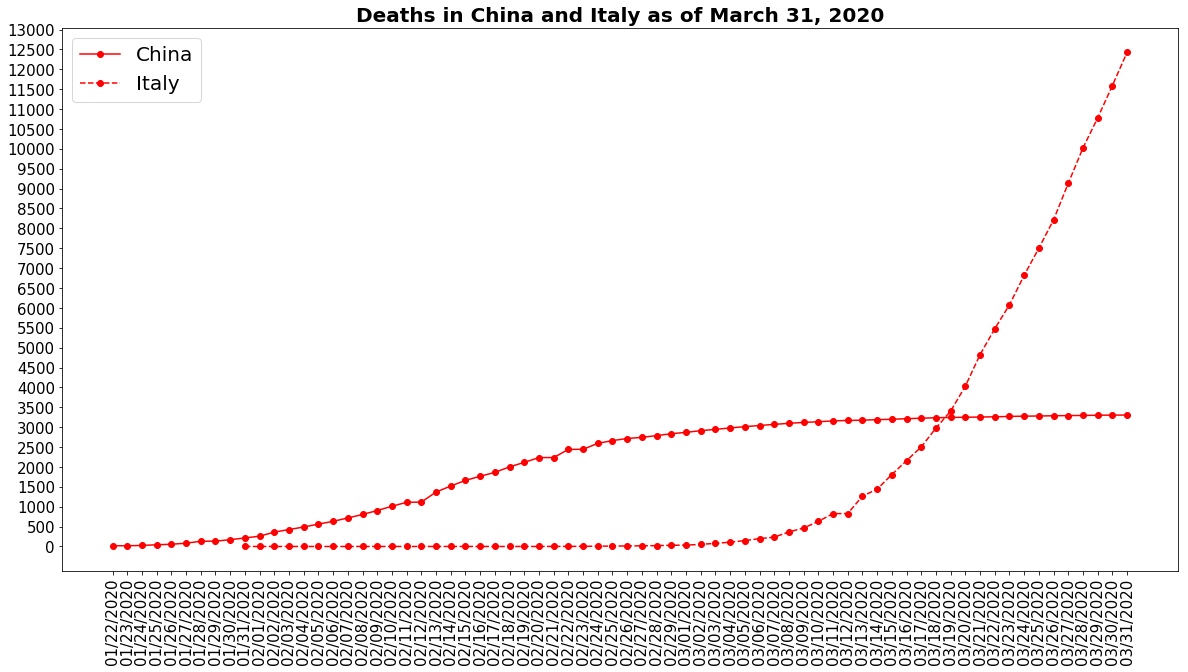

In [5]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(np.arange(0, 15000, step = 500), fontsize = 15)
plt.title("Deaths in China and Italy as of March 31, 2020", fontsize = 20, fontweight = "bold")
plt.plot(covid19_Mar_China_dt["ObservationDate"], covid19_Mar_China_dt["Deaths"], "ro-")
plt.plot(covid19_Mar_Italy_dt["ObservationDate"], covid19_Mar_Italy_dt["Deaths"], "ro--")
plt.legend(["China", "Italy"], fontsize = 20)

# Case Summary: United States
### The first case of COVID-19 in the United States was identified in Washington in late January. The initial delay in instilling preventive measures ultimately led to significant community transmission in the U.S. New York in particular experienced a significant increase in cases in mid-March and has since become the state with the highest number of cases.

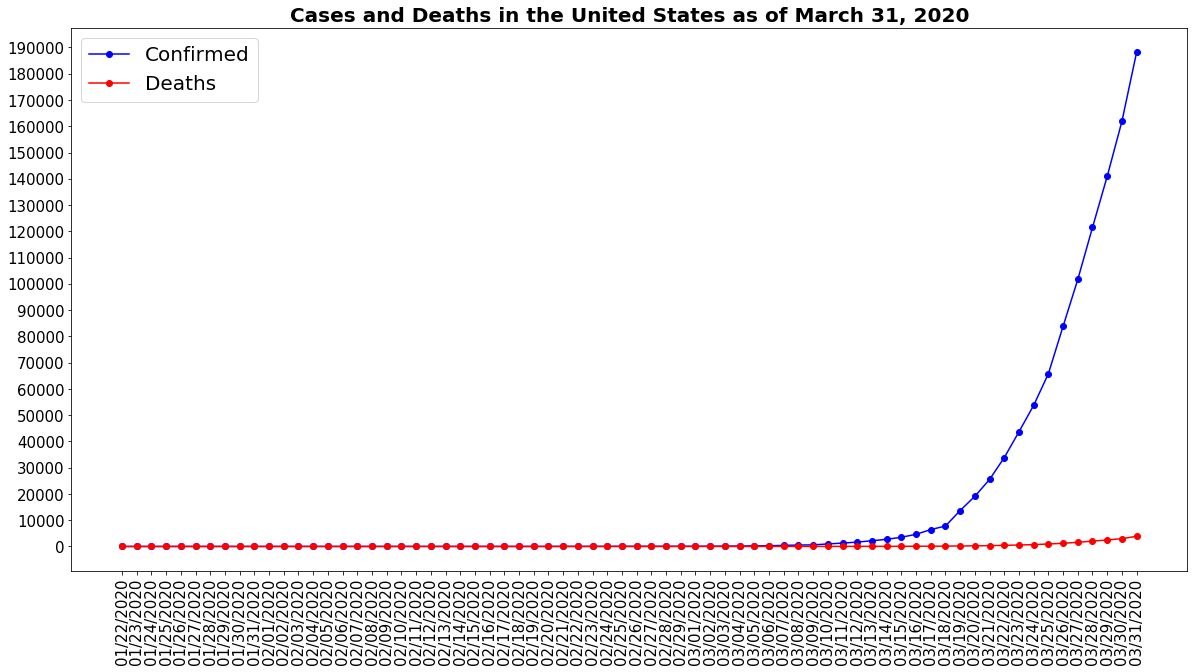

In [6]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(np.arange(0, 200000, step = 10000), fontsize = 15)
plt.title("Cases and Deaths in the United States as of March 31, 2020", fontsize = 20, fontweight = "bold")
plt.plot(covid19_Mar_US_dt["ObservationDate"], covid19_Mar_US_dt["Confirmed"], "bo-")
plt.plot(covid19_Mar_US_dt["ObservationDate"], covid19_Mar_US_dt["Deaths"], "ro-")
plt.legend(fontsize = 20)

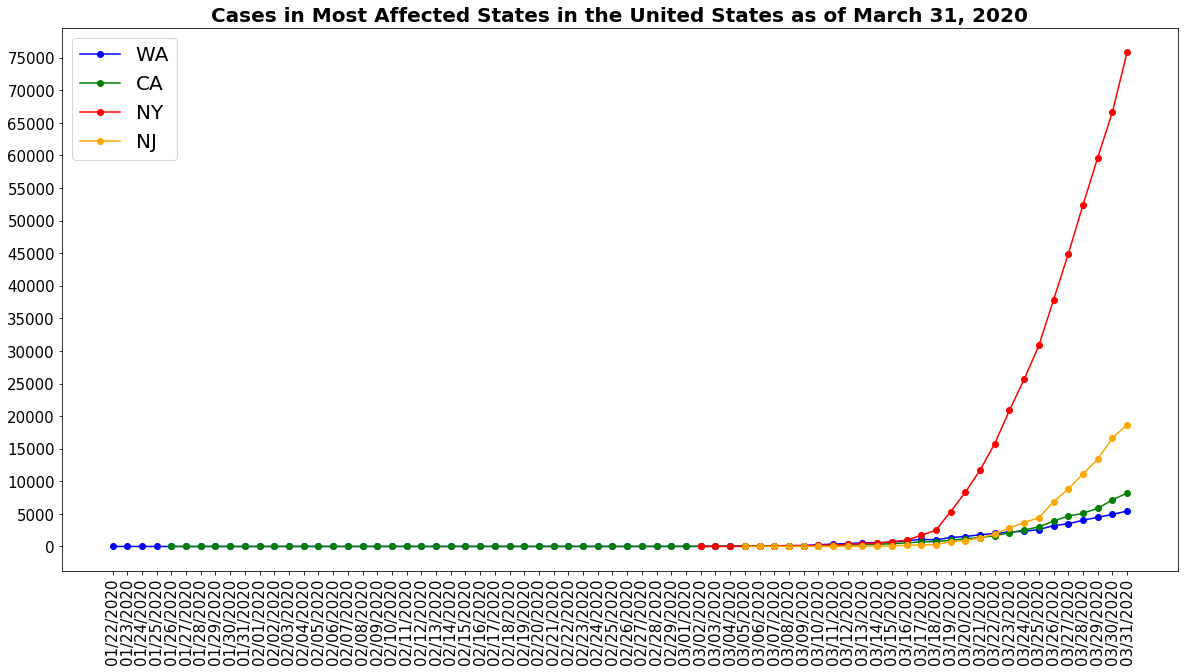

In [7]:
covid19_Mar_US_WA = covid19_Mar_US[covid19_Mar_US["Province/State"].str.contains("Washington|WA")]
covid19_Mar_US_WA_dt = covid19_Mar_US_WA.groupby("ObservationDate").sum().reset_index()

covid19_Mar_US_CA = covid19_Mar_US[covid19_Mar_US["Province/State"].str.contains("California|CA")]
covid19_Mar_US_CA_dt = covid19_Mar_US_CA.groupby("ObservationDate").sum().reset_index()

covid19_Mar_US_NY = covid19_Mar_US[covid19_Mar_US["Province/State"].str.contains("New York|NY")]
covid19_Mar_US_NY_dt = covid19_Mar_US_NY.groupby("ObservationDate").sum().reset_index()

covid19_Mar_US_NJ = covid19_Mar_US[covid19_Mar_US["Province/State"].str.contains("New Jersey|NJ")]
covid19_Mar_US_NJ_dt = covid19_Mar_US_NJ.groupby("ObservationDate").sum().reset_index()


plt.figure(figsize = (20,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(np.arange(0, 100000, step = 5000), fontsize = 15)
plt.title("Cases in Most Affected States in the United States as of March 31, 2020", fontsize = 20, fontweight = "bold")
plt.plot(covid19_Mar_US_WA_dt["ObservationDate"], covid19_Mar_US_WA_dt["Confirmed"], "bo-")
plt.plot(covid19_Mar_US_CA_dt["ObservationDate"], covid19_Mar_US_CA_dt["Confirmed"], "go-")
plt.plot(covid19_Mar_US_NY_dt["ObservationDate"], covid19_Mar_US_NY_dt["Confirmed"], "ro-")
plt.plot(covid19_Mar_US_NJ_dt["ObservationDate"], covid19_Mar_US_NJ_dt["Confirmed"], "o-", color = "orange")
plt.legend(["WA", "CA", "NY", "NJ"], fontsize = 20)